In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/biased_leukemia_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,...,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,...,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,...,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,...,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,...,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


In [3]:
print(df.isnull().sum())
df.dropna(inplace=True)

Patient_ID              0
Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64


In [4]:
print(df.describe())
print(df.info())

         Patient_ID            Age      WBC_Count      RBC_Count  \
count  143194.00000  143194.000000  143194.000000  143194.000000   
mean    71597.50000      44.945200    7001.289879       4.998193   
std     41336.69156      25.737805    2007.444410       0.500298   
min         1.00000       1.000000   -1602.000000       2.940000   
25%     35799.25000      23.000000    5644.250000       4.660000   
50%     71597.50000      45.000000    7007.000000       5.000000   
75%    107395.75000      67.000000    8352.000000       5.340000   
max    143194.00000      89.000000   15586.000000       7.150000   

       Platelet_Count  Hemoglobin_Level  Bone_Marrow_Blasts            BMI  
count   143194.000000     143194.000000       143194.000000  143194.000000  
mean    249933.012137         13.498334           49.547984      24.990679  
std      49842.308243          1.996714           28.837607       4.999786  
min      46069.000000          4.700000            0.000000       2.800000  
25

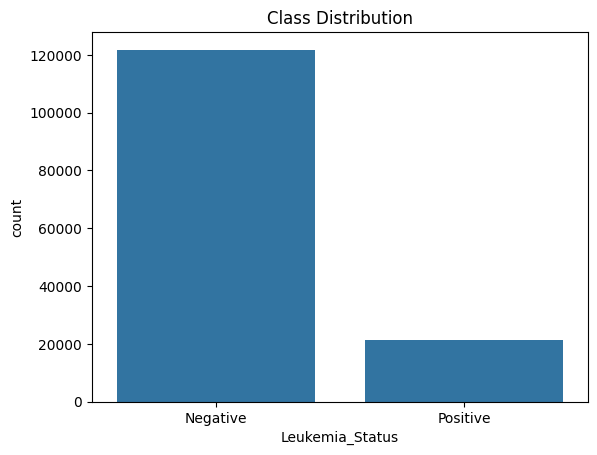

In [5]:
sns.countplot(x=df['Leukemia_Status'])
plt.title("Class Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

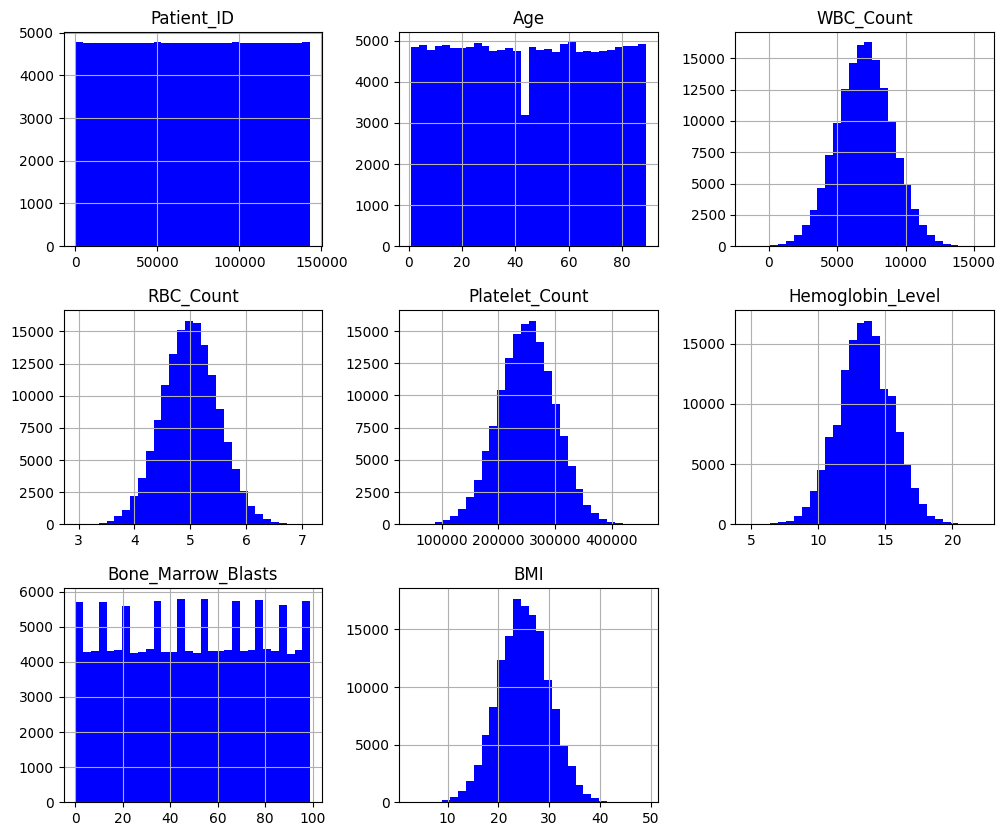

In [6]:
plt.figure(figsize=(12,6))
df.hist(bins=30, figsize=(12, 10), color='blue')
plt.show()

In [7]:
le = LabelEncoder()

categorical_cols = ["Gender", "Country", "Genetic_Mutation", "Family_History",
                    "Smoking_Status", "Alcohol_Consumption", "Radiation_Exposure",
                    "Infection_History", "Chronic_Illness", "Immune_Disorders",
                    "Ethnicity", "Socioeconomic_Status", "Urban_Rural"]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
le = LabelEncoder()
df['Leukemia_Status'] = le.fit_transform(df['Leukemia_Status'])  # Encode target variable if categorical

In [9]:
X = df.drop(columns=['Leukemia_Status'])  # Independent variables
y = df['Leukemia_Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


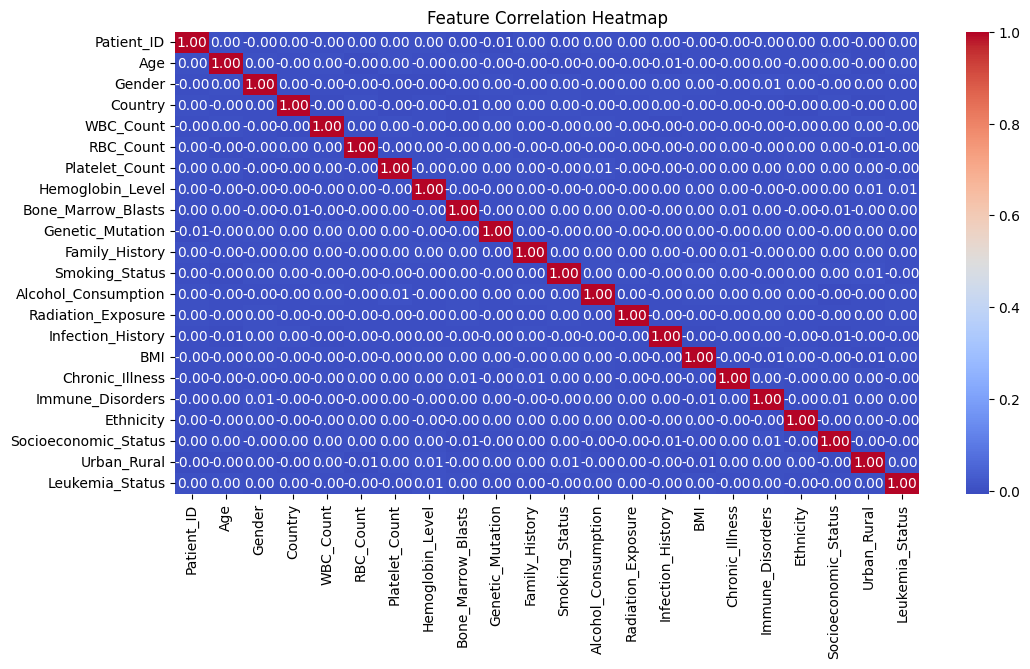

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.84947100108244
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     24328
           1       0.00      0.00      0.00      4311

    accuracy                           0.85     28639
   macro avg       0.42      0.50      0.46     28639
weighted avg       0.72      0.85      0.78     28639

Confusion Matrix:
 [[24328     0]
 [ 4311     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


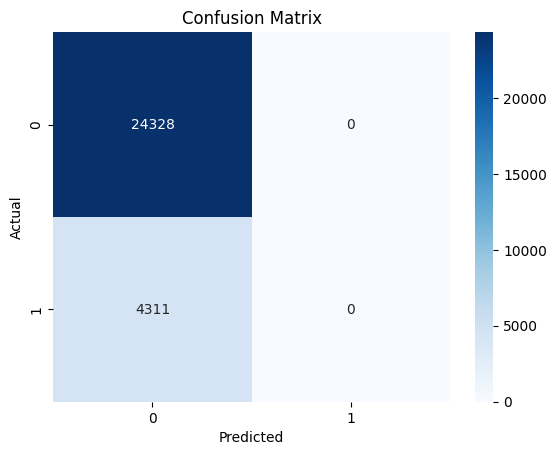

In [13]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


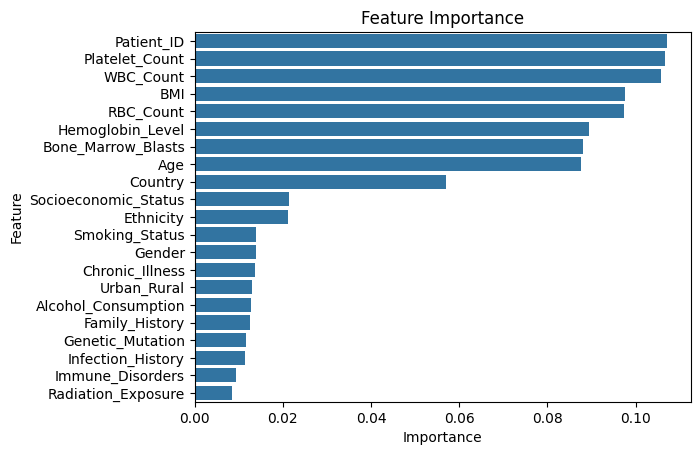

In [15]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

In [16]:
import joblib
joblib.dump(model, "leukemia_prediction_model.pkl")

['leukemia_prediction_model.pkl']

In [21]:
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,1,4,2698,5.36,262493,12.2,72,1,...,0,0,0,24.0,0,0,1,1,0,0
1,2,15,0,4,4857,4.81,277877,11.9,97,1,...,0,0,0,28.7,0,0,0,1,1,1
2,3,72,1,5,9614,5.17,319600,13.4,94,0,...,1,0,0,27.7,0,0,1,1,1,0
3,4,61,1,2,6278,5.41,215200,11.6,50,0,...,0,0,0,31.6,0,0,0,2,0,0
4,5,21,1,2,8342,4.78,309169,14.3,28,0,...,0,0,0,22.3,0,0,1,1,0,0


In [23]:
new_data = np.array([[143195,55,1,4,44578,5.89,235744,13.5, 87,0,0,1,0,0,0,23,0,1,1,2,1]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted Class:", le.inverse_transform(prediction))

Predicted Class: ['Negative']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
